'''# Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a
given location and time. Weather forecasts are made by collecting quantitative data about the current state of the 
atmosphere at a given place and using meteorology to project how the atmosphere will change.'''

''' Features Description:

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".'''



# 

 Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



In [1]:
# Import important libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn .metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

rain=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Inspection

In [5]:
rain.shape     # Total rows and columns

(8425, 23)

In [6]:
rain.info()      # See the datatypes associated 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Observation:
    
1.  From the above dataset we have to predict if it will rain tommorow or not hence it will be a classification problem.

2. We have to also find how much it will rain is yes using regression problem.

3. We have 7 features as object type among which 6 are independent  and one is our target variable.

4. We have 16  features of numerical(float type) among which are independent as per problem statement and rainfall is the dependent column.

5. The target  varibles itself having missing values in this dataset.

In [7]:
# Check for null values:

rain.isnull().sum()   # Almost all the columns are having null values except date and column

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
rain.describe()   # Shows the statistical data of numerical values

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


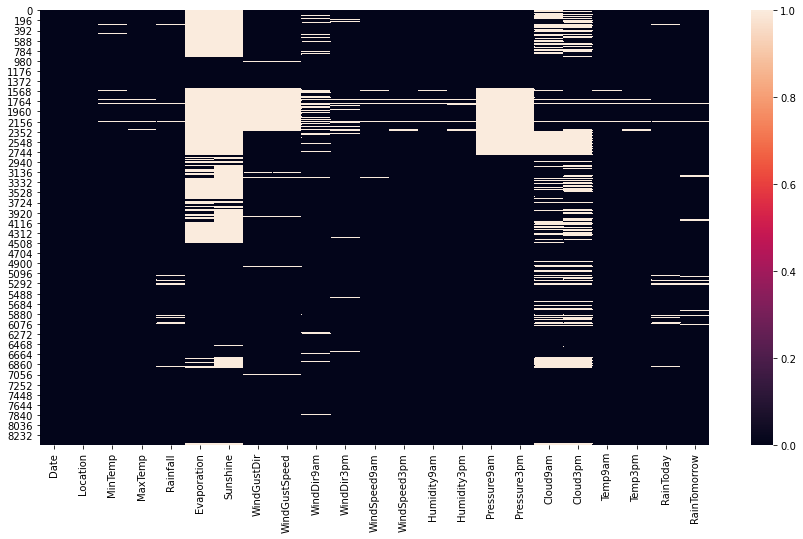

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(rain.isnull())
plt.show()

# Data Cleaning and dealing with data 

In [10]:
#train.Date=rain.Date.astype('int64')

In [11]:
# Treating the Date columns and make seperate columns


rain['Date']=pd.to_datetime(rain['Date'],format='%Y-%m-%d')

rain['year']=rain['Date'].apply(lambda x:x.year)
rain['Month']=rain['Date'].apply(lambda x:x.month)
rain['Day']=rain['Date'].apply(lambda x:x.day)


In [12]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [13]:
rain.drop('Date',axis=1,inplace=True)

In [14]:
rain.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2


In [15]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [16]:
# Let us seperate out the categorical values so that we can treat the missing values:

categorical=[feature for feature in rain.columns if rain[feature].dtype=='O'] # not showing Date column as it has being already treated.
print(len(categorical))
categorical


6


['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [17]:
# We got a list of categorical variable hence we shoul treat the missing values of it with mode.
rain[categorical].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [18]:
# Dealing Missing Value with mode

rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0], inplace=True)
rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0], inplace=True)
rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0], inplace=True)
rain['RainToday'].fillna(rain['RainToday'].mode()[0], inplace=True)
rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0], inplace=True)


In [19]:
rain[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [20]:
rain['WindGustDir'].value_counts() # Can be changed using LabelEncoding

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64

In [21]:
rain['WindDir9am'].value_counts()

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64

In [22]:
rain['WindDir3pm'].value_counts()

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
ESE     462
W       462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64

In [23]:
rain['RainToday'].value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

In [24]:
rain['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

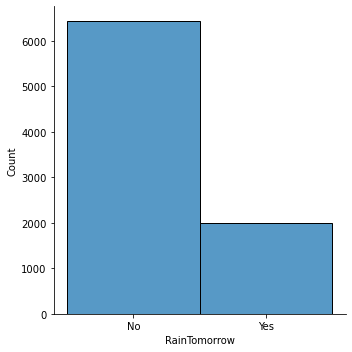

In [25]:
sns.displot(rain['RainTomorrow'])

The target variable seems to be really imbalance data.

In [26]:
#  Let us seperate out the numnerical  values so that we can treat the missing values:

numerical=[feature for feature in rain.columns if rain[feature].dtype!='O'] # Will be showing date column in 3 different columns.
print(len(numerical))
numerical

19


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'Month',
 'Day']

In [27]:
rain[numerical].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
Month               0
Day                 0
dtype: int64

With the above numerical value we will visualize the data i.e outliers then we may decide wheather to fill the missing values with mean or median

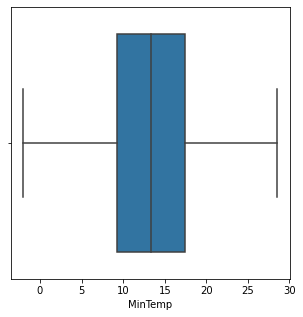

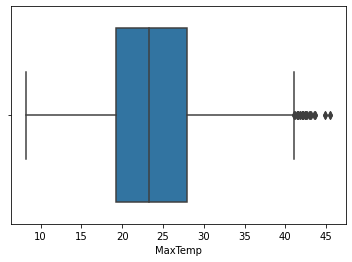

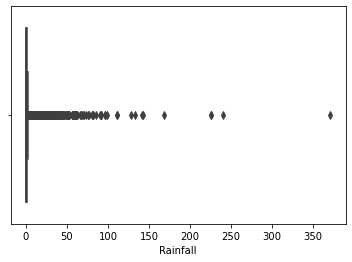

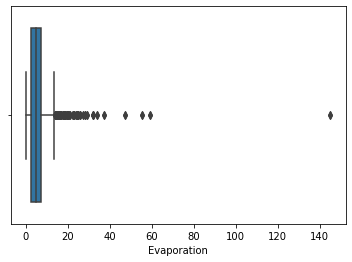

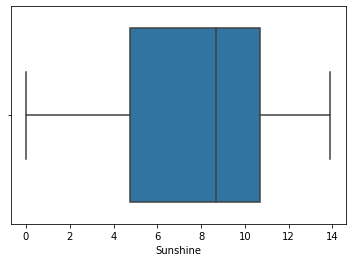

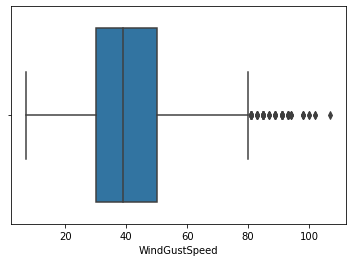

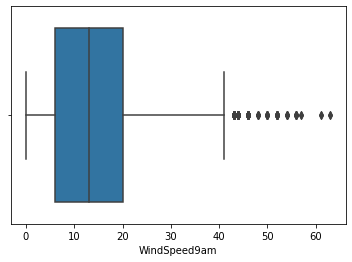

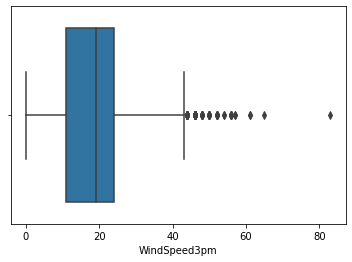

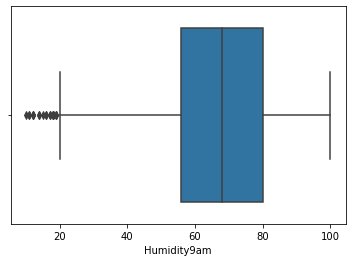

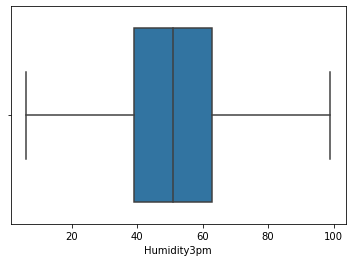

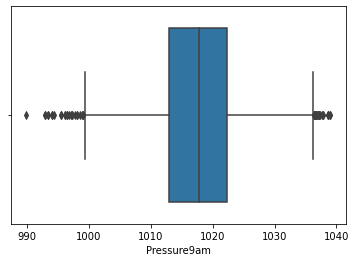

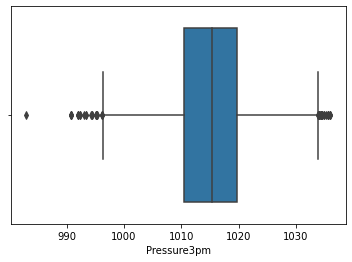

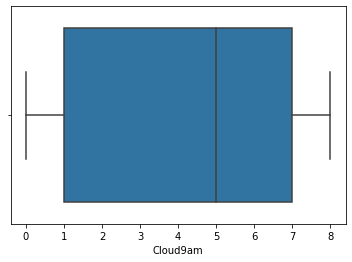

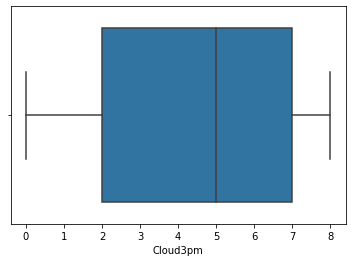

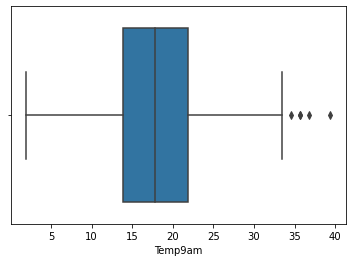

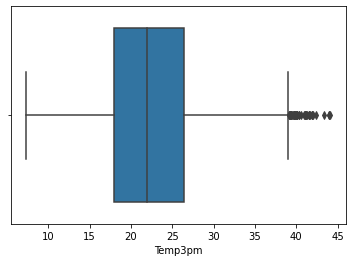

In [28]:
# We shall  determine the oiutliers in all the numerical features


plt.figure(figsize=(5,5))
sns.boxplot(rain.MinTemp )
plt.show()
sns.boxplot(rain.MaxTemp)
plt.show()
sns.boxplot(rain.Rainfall )
plt.show()
sns.boxplot(rain.Evaporation)
plt.show()
sns.boxplot(rain.Sunshine)
plt.show()
sns.boxplot(rain.WindGustSpeed)
plt.show()
sns.boxplot(rain.WindSpeed9am)
plt.show()
sns.boxplot(rain.WindSpeed3pm)
plt.show()
sns.boxplot(rain.Humidity9am)
plt.show()
sns.boxplot(rain.Humidity3pm)
plt.show()
sns.boxplot(rain.Pressure9am)
plt.show()
sns.boxplot(rain.Pressure3pm)
plt.show()
sns.boxplot(rain.Cloud9am)
plt.show()
sns.boxplot(rain.Cloud3pm)
plt.show()
sns.boxplot(rain.Temp9am)
plt.show()
sns.boxplot(rain.Temp3pm)
plt.show()

Rainfall,Evapouration,windgust,windspeed,pressure,Temp are the columns having more no of outliers so we will be filling the 
missing values of these columns with median and rest with mode.

In [29]:
# For imputing numeriocal features we using mean or median as per requirement:
# As we have high number of outliers in the numerical feature it is recommemnded to go with median rather than mean or mode
rain['MinTemp'].fillna(rain['MinTemp'].mean(), inplace=True)
rain['MaxTemp'].fillna(rain['MaxTemp'].mean(), inplace=True)
rain['Sunshine'].fillna(rain['Sunshine'].mean(), inplace=True)
rain['Humidity9am'].fillna(rain['Humidity9am'].mean(), inplace=True)
rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean(), inplace=True)
rain['Cloud9am'].fillna(rain['Cloud9am'].mean(), inplace=True)
rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean(), inplace=True)

rain['Rainfall'].fillna(rain['Rainfall'].median(), inplace=True)
rain['Evaporation'].fillna(rain['Evaporation'].median(), inplace=True)
rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].median(), inplace=True)
rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].median(), inplace=True)
rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].median(), inplace=True)
rain['Pressure9am'].fillna(rain['Pressure9am'].median(), inplace=True)
rain['Pressure3pm'].fillna(rain['Pressure3pm'].median(), inplace=True)
rain['Temp9am'].fillna(rain['Temp9am'].median(), inplace=True)
rain['Temp3pm'].fillna(rain['Temp3pm'].median(), inplace=True)

In [30]:
rain[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
Day              0
dtype: int64

<AxesSubplot:>

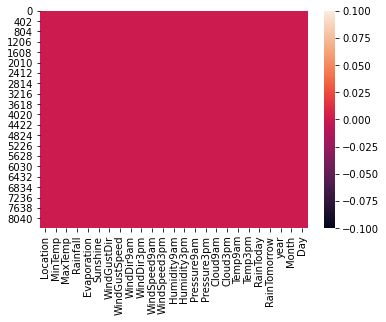

In [31]:
sns.heatmap(rain.isnull())

<Figure size 288x288 with 0 Axes>

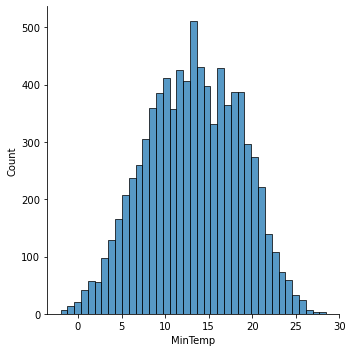

<Figure size 288x288 with 0 Axes>

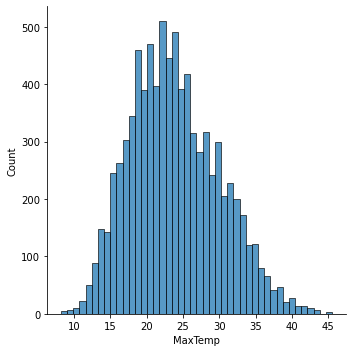

<Figure size 288x288 with 0 Axes>

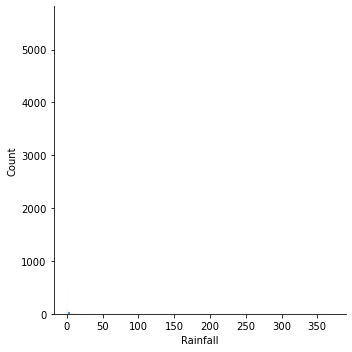

<Figure size 288x288 with 0 Axes>

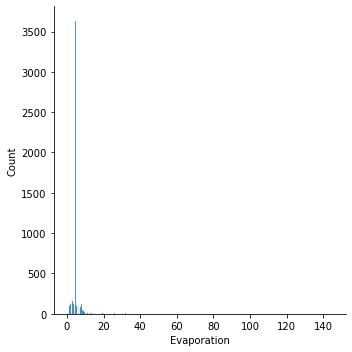

<Figure size 288x288 with 0 Axes>

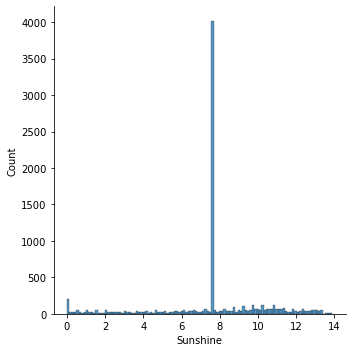

<Figure size 288x288 with 0 Axes>

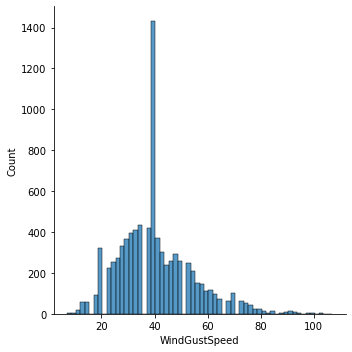

<Figure size 288x288 with 0 Axes>

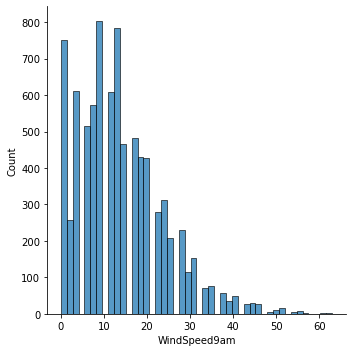

<Figure size 288x288 with 0 Axes>

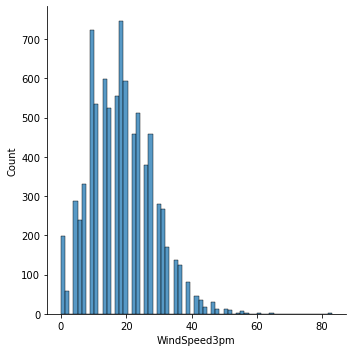

<Figure size 288x288 with 0 Axes>

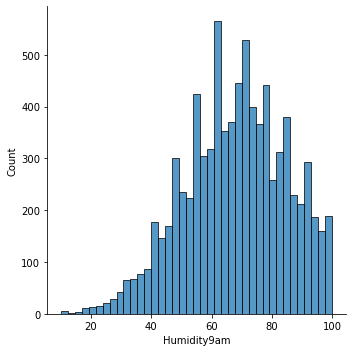

<Figure size 288x288 with 0 Axes>

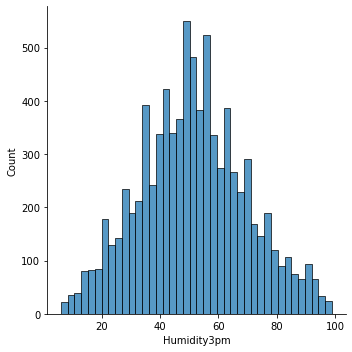

<Figure size 288x288 with 0 Axes>

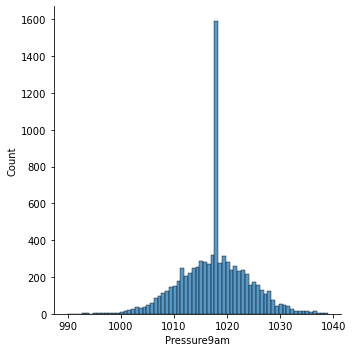

<Figure size 288x288 with 0 Axes>

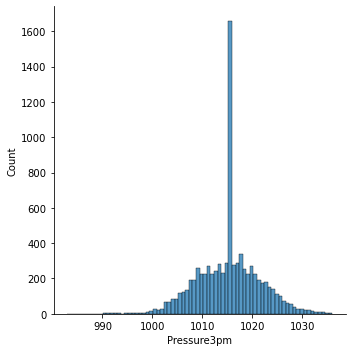

<Figure size 288x288 with 0 Axes>

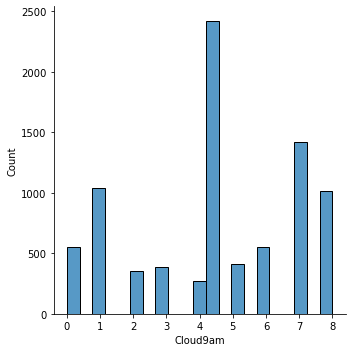

<Figure size 288x288 with 0 Axes>

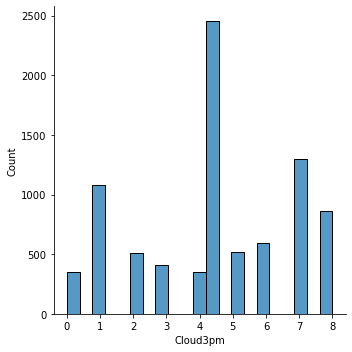

<Figure size 288x288 with 0 Axes>

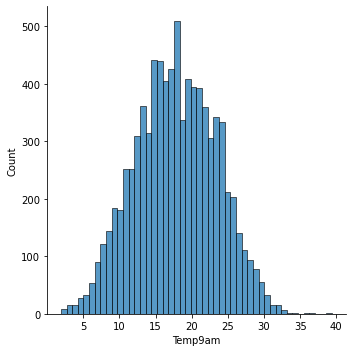

<Figure size 288x288 with 0 Axes>

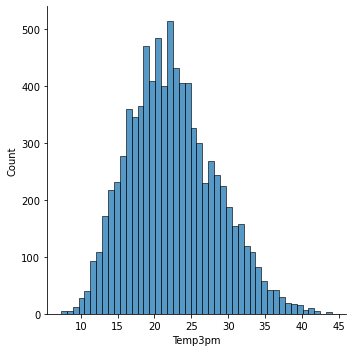

<Figure size 288x288 with 0 Axes>

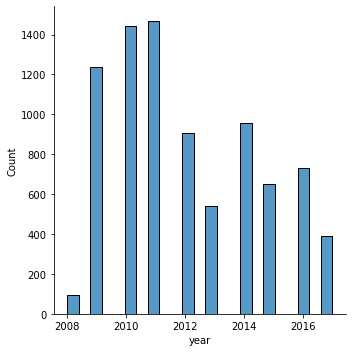

<Figure size 288x288 with 0 Axes>

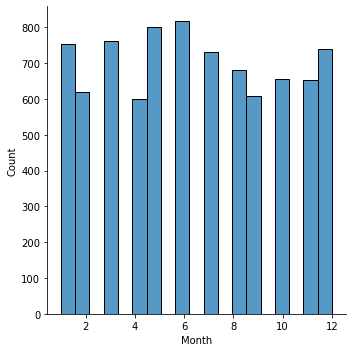

<Figure size 288x288 with 0 Axes>

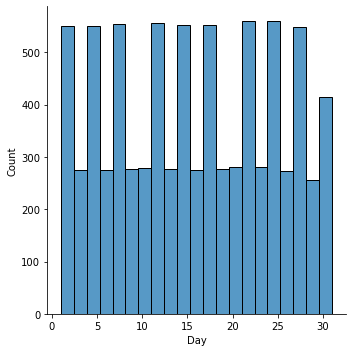

In [32]:
for i in numerical:
    plt.figure(figsize=(4,4))
    sns.displot(rain[i])
    plt.show()

Observation:

1. Max and Min temp are almost seen normalised.
2. Evaporation is absolutely skewed.
3. Around 7 hours there is bright sunshine.
4. windgust is seen to be normal but having some outliers.
5. Windspeed seems to be slightly left skewed.
6. Humidity at 3pm is normalised.
7. Humidity at 9 am is right skewed.
8. Pressure is seen slightly right skewed with some outliers.
9. Temperature is almost normally distributed.
10. most of the data is collected in the year 2010 followed by 2009 and 2014.
11. Almost all the months data collections are more or less varies in alternate months
12. Datais collected more on alternate days. 

<AxesSubplot:>

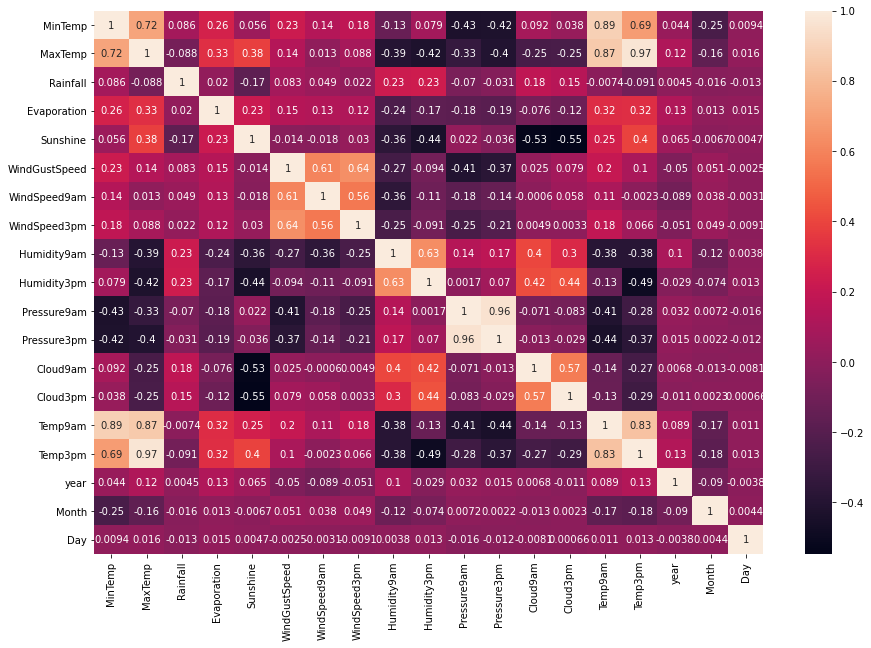

In [33]:
plt.figure(figsize=(15,10))

sns.heatmap(rain.corr(),annot=True)

Min and max Temp are highly correlated.

Also Temp  at 3am and 9pm are hoghly correlated.

Also we can see that temp at 3am and 9pm and min and max temp are highly correalated.

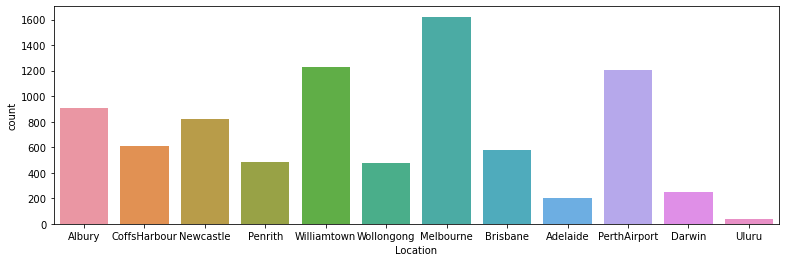

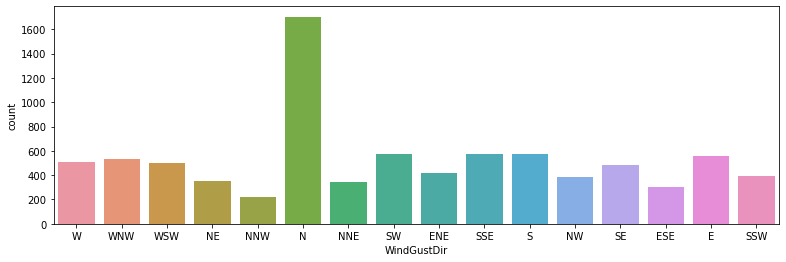

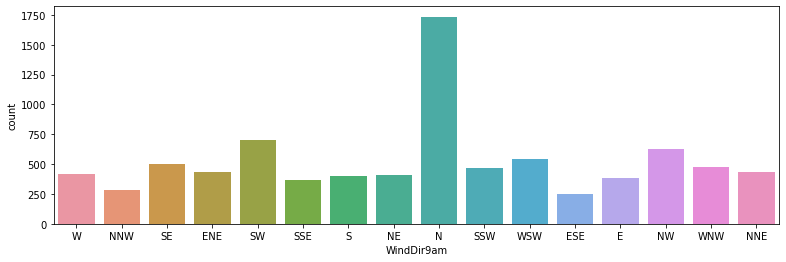

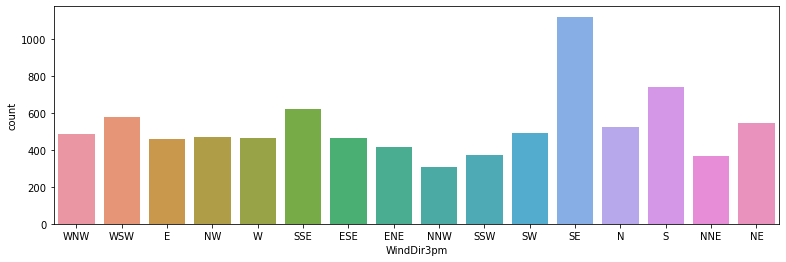

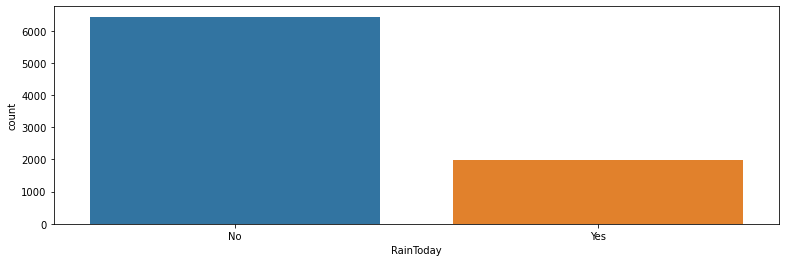

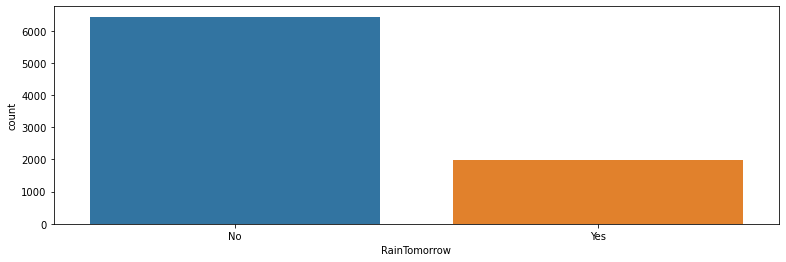

In [34]:
for i in categorical:
    plt.figure(figsize=(13,4))
    sns.countplot(rain[i])
    plt.show()

Observation:

1. Data collected from Melbourne is mamximum in number.

2. WindGust Direction from North is highest.

3. WindDirection at 9am is maximum from North again.

4. WindDirection at 3pm is SouthEast followed by South.



Text(0.5, 1.0, 'Location Vs WindGustDir')

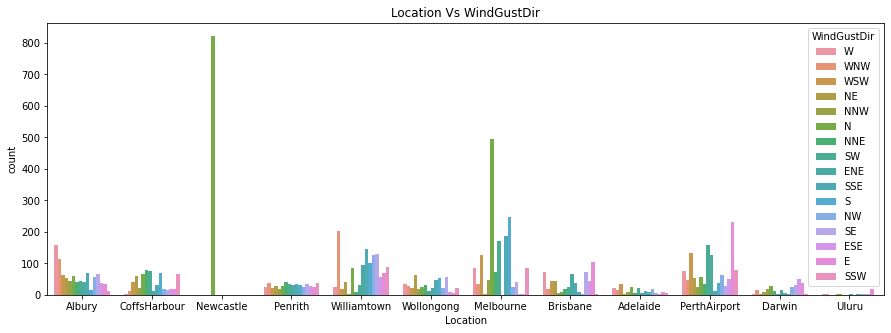

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x='Location',hue='WindGustDir',data=rain)
plt.title('Location Vs WindGustDir')

Text(0.5, 1.0, 'Location Vs RainTomorrow')

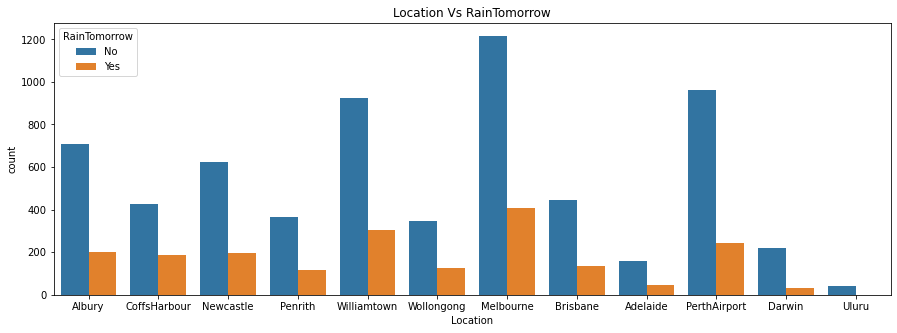

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x='Location',hue='RainTomorrow',data=rain)
plt.title('Location Vs RainTomorrow')

Text(0.5, 1.0, 'Location Vs RainToday')

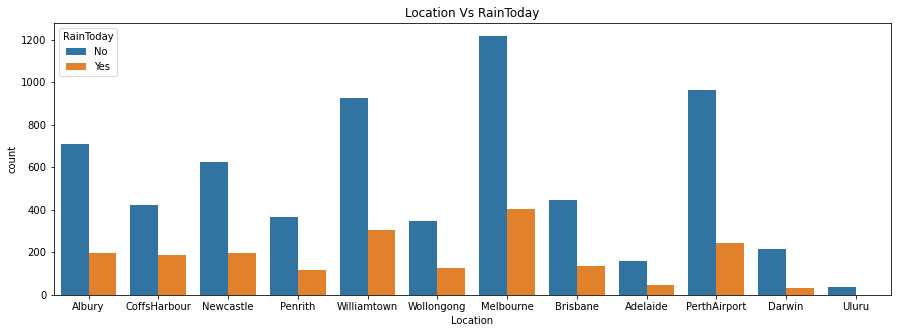

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x='Location',hue='RainToday',data=rain)
plt.title('Location Vs RainToday')

Text(0.5, 1.0, 'Location Vs RainTomorrow')

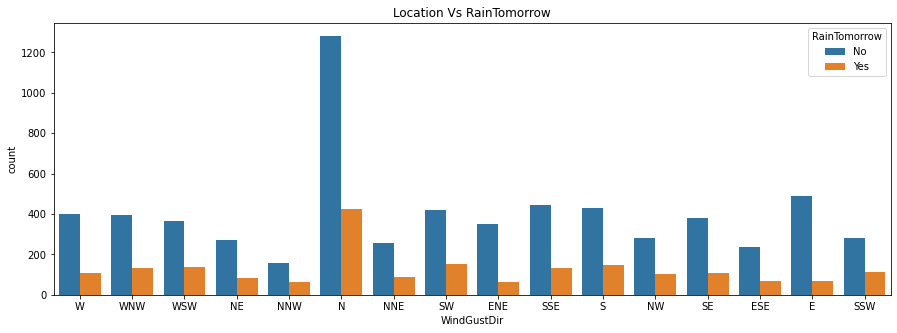

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='WindGustDir',hue='RainTomorrow',data=rain)
plt.title('Location Vs RainTomorrow')   

North direction wind gust is causing much tendency of rainfall tomorrow

In [39]:
# Change the categorical variables

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [40]:
# Making use of LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:

rain['Location']=le.fit_transform(rain['Location'])
rain['WindGustDir']=le.fit_transform(rain['WindGustDir'])
rain['WindDir9am']=le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm']=le.fit_transform(rain['WindDir3pm'])
rain['RainToday']=le.fit_transform(rain['RainToday'])
rain['RainTomorrow']=le.fit_transform(rain['RainTomorrow'])

In [42]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [43]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


<AxesSubplot:>

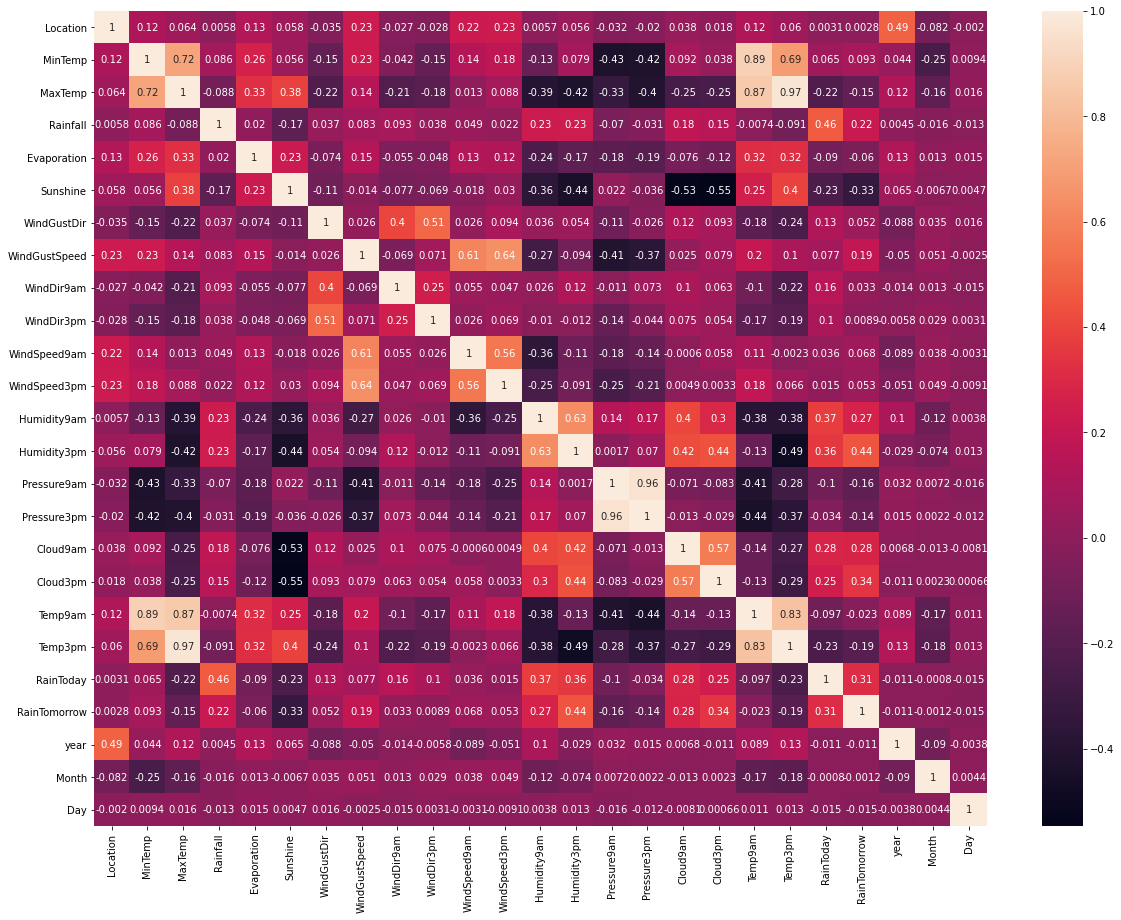

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(rain.corr(),annot=True)

# Model Building

In [45]:
rain_rainfallTomorrow=rain.copy()  # Copy of rain dataset to perform model building on rainfall tomorrow using classification
rain_rainfall_mm=rain.copy()    # Copy of rain dataset to perform model building rainfall in mm using regression.

# Building the model on rainfall in mm

In [46]:
rain_rainfall_mm.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [47]:
Y=rain_rainfall_mm['Rainfall']    # Dependent variable
X=rain_rainfall_mm.drop('Rainfall',axis=1)# Independent variable

In [48]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)

In [49]:
max_accuracy=0
for i in range(1,150):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    accuracy=r2_score(Y_test,Y_pred)*100
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        rs=i
print(f"The highest accuracy is {max_accuracy} at random state {rs}")
    
    

The highest accuracy is 41.08731010093143 at random state 144


In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=144)

In [51]:
Linear=LinearRegression()


RandomForest=RandomForestRegressor()
Ridge=Ridge()
lasso=Lasso()

In [52]:
algo=[Linear,RandomForest,Ridge,lasso]
acc_models={}
for model in algo:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print("-"*60)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LinearRegression() has:: 
	 Accuracy :: 41.1% 
	 Mean Absolute Error is :: 2.900420327680806 
	 Mean Squared Error is :: 30.700804254594953 
	 Root Mean Squared Error is :: 5.540830646626456
------------------------------------------------------------


------------------------------------------------------------
The model RandomForestRegressor() has:: 
	 Accuracy :: 39.2% 
	 Mean Absolute Error is :: 1.74899762611276 
	 Mean Squared Error is :: 31.67329840178042 
	 Root Mean Squared Error is :: 5.62790355299204
------------------------------------------------------------


------------------------------------------------------------
The model Ridge() has:: 
	 Accuracy :: 40.9% 
	 Mean Absolute Error is :: 2.871905408337463 
	 Mean Squared Error is :: 30.799091906582305 
	 Root Mean Squared Error is :: 5.549692956063633
------------------------------------------------------------


----------------------------------

In [53]:
acc_models

{LinearRegression(): 41.1,
 RandomForestRegressor(): 39.2,
 Ridge(): 40.9,
 Lasso(): 31.1}

All the models giving very less accuracy with the dataset as it was clearly visible in the correlation map that 

rainfall in mm is hardly correlated with any of the feature.

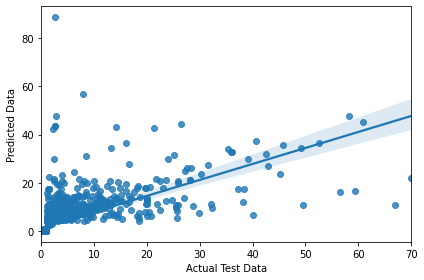

In [54]:
RandomForest=RandomForestRegressor()
RandomForest.fit(X_train,Y_train)
Y_pred=RandomForest.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

In [55]:
df=pd.DataFrame({'Y Test':Y_test,'Pred':Y_pred},columns=['Y Test','Pred'])
df.head()

,Y Test,Pred
1835,0.0,0.020
1276,9.8,17.862
6973,0.0,0.002
840,0.0,0.074
4674,27.2,24.752


# Hyper Tuning

In [56]:
X_train,Y_train,X_test,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=80)
estimator=RandomForestRegressor()

param_grid={
    "n_estimators":[10,20,30],
    "max_features":["auto", "sqrt", "log2"],
    "min_samples_split":[2,4,8],
    "bootstrap":[True,False]    
}
gridsearch=GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

gridsearch.fit(X_scaled,Y)
print(gridsearch.best_params_ , gridsearch.best_score_)


{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 30} 0.5035030776057259


In [57]:
RandomForest=RandomForestRegressor(n_estimators=30,max_features='sqrt',min_samples_split=4,bootstrap=False)
RandomForest.fit(X_scaled,Y)
Y_pred=RandomForest.predict(X_scaled)
r2_sc=r2_score(Y,Y_pred)
print("r2_score:",r2_sc*100)


r2_score: 97.80506702169916


# Build the model on the rainTomorrow using Classification:

In [58]:
rain_rainfallTomorrow=rain.copy()  # Copy of rain dataset to perform model building on rainfall tomorrow using classification

rain_rainfallTomorrow.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,Day
0,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [59]:
# assinging the values of x and y for training and testing


x_c=rain.drop(columns=['RainTomorrow'],axis=1)# independent variables
y_c=rain['RainTomorrow']  # dependent Variables
print(x_c.shape)
print(y_c.shape)

(8425, 24)
(8425,)


In [60]:
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=42,test_size=0.33)

print('X-train shape:',xc_train.shape)
print('Y-train shape:',yc_train.shape)
print('X-test shape:',xc_test.shape)
print('Y-test shape:',yc_test.shape)



X-train shape: (5644, 24)
Y-train shape: (5644,)
X-test shape: (2781, 24)
Y-test shape: (2781,)


In [61]:
sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [62]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pred_c=i_c.predict(xc_test)
        acc_score=accuracy_score(yc_test,pred_c)
        print (" Accuracy score to random state:",r_state,"is",acc_score)
        print('---------------------')
        if acc_score > max_accuracy_score:
            max_accuracy_score=acc_score
            final_state=r_state
            final_model=i_c

print("Final accuracy at random state:",final_state,'is',max_accuracy_score,'with model:',final_model)

 Accuracy score to random state: 40 is 0.8270406328658756
---------------------
 Accuracy score to random state: 40 is 0.8363897878460985
---------------------
 Accuracy score to random state: 40 is 0.8277597986335851
---------------------
 Accuracy score to random state: 40 is 0.891405969075872
---------------------
 Accuracy score to random state: 41 is 0.8238043869111831
---------------------
 Accuracy score to random state: 41 is 0.8180510607695074
---------------------
 Accuracy score to random state: 41 is 0.8191298094210716
---------------------
 Accuracy score to random state: 41 is 0.8788205681409564
---------------------
 Accuracy score to random state: 42 is 0.837108953613808
---------------------
 Accuracy score to random state: 42 is 0.8320747932398418
---------------------
 Accuracy score to random state: 42 is 0.8256023013304566
---------------------
 Accuracy score to random state: 42 is 0.8985976267529665
---------------------
 Accuracy score to random state: 43 is 0.8

In [63]:
Random=RandomForestClassifier(random_state=42)
Random.fit(xc_train,yc_train)
predC=Random.predict(xc_test)
acu_score=accuracy_score(yc_test,predC)
print("Accuracy Score:",acu_score*100)

Accuracy Score: 88.06184825602301


# Cross validation

In [64]:
score=cross_val_score(Random,x_c,y_c,cv=100,scoring="accuracy").mean()
print('Cross_val',score*100)
print('Mean score',score.mean()*100)
print("stand_Score",score.std())

Cross_val 90.09635854341737
Mean score 90.09635854341737
stand_Score 0.0


After Cross validating there is increase in 2 % increase the accuracy

# Confusion matrix:

In [65]:
con_matC=confusion_matrix(yc_test,predC)
con_matC

array([[2028,   65],
       [ 267,  421]], dtype=int64)

In [66]:
# ROC curve

#It is a plot of positive rate(x-axis) versus the true positive rate(y-axis) for different threshhold

In [67]:
pred_probability=Random.predict_proba(xc_test)[:,1]
pred_probability


array([0.24, 0.01, 0.45, ..., 0.  , 0.  , 0.49])

In [68]:
fpr,tpr,thresholds=roc_curve(yc_test,pred_probability,pos_label=True)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.77783086e-04 4.77783086e-04 4.77783086e-04
 4.77783086e-04 4.77783086e-04 4.77783086e-04 4.77783086e-04
 4.77783086e-04 4.77783086e-04 9.55566173e-04 1.43334926e-03
 1.91113235e-03 1.91113235e-03 2.38891543e-03 2.86669852e-03
 2.86669852e-03 2.86669852e-03 3.34448161e-03 4.30004778e-03
 4.77783086e-03 4.77783086e-03 4.77783086e-03 4.77783086e-03
 5.73339704e-03 6.21118012e-03 7.16674630e-03 7.16674630e-03
 7.64452938e-03 7.64452938e-03 1.00334448e-02 1.19445772e-02
 1.29001433e-02 1.33779264e-02 1.38557095e-02 1.62446249e-02
 1.72001911e-02 1.81557573e-02 2.00668896e-02 2.38891543e-02
 2.53225036e-02 2.62780698e-02 2.81892021e-02 3.01003344e-02
 3.10559006e-02 3.20114668e-02 3.34448161e-02 3.48781653e-02
 3.63115146e-02 3.87004300e-02 4.10893454e-02 4.58671763e-02
 4.77783086e-02 5.16005733e-02 5.59006211e-02 5.92451027e-02
 6.16340182e-02 6.68896321e-02 7.07118968e-02 7.26230291e-02
 7.59675108e-02 7.978977

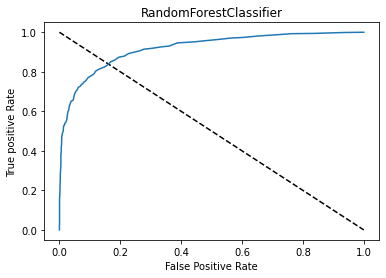

In [69]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('RandomForestClassifier')
plt.show()